In [1]:
from itertools import product
from tqdm import tqdm_notebook
import statsmodels.api as sm
import warnings
ps = range(0, 5)
d= 1
qs = range(0, 5)
Ps = range(0, 5)
D= 1
Qs = range(0, 5)
s= 5



In [2]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

In [3]:
def optimize_SARIMA(parameters_list, d, D, s):
    results = []
    best_aic = float('inf')
    for param in tqdm_notebook(parameters_list):
        try: 
            model = sm.tsa.statespace.SARIMAX(data.CLOSE, order=(param[0], d,
            param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param

    results.append([param, model.aic])
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    result_table = result_table.sort_values(by='aic',ascending=True).reset_index(drop=True)
    return result_table
result_table = optimize_SARIMA(parameters_list, d, D, s)
p, q, P, Q = result_table.parameters[0]

C:\Users\chand\AppData\Local\Temp\ipykernel_18128\4059141615.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/625 [00:00<?, ?it/s]

UnboundLocalError: local variable 'model' referenced before assignment

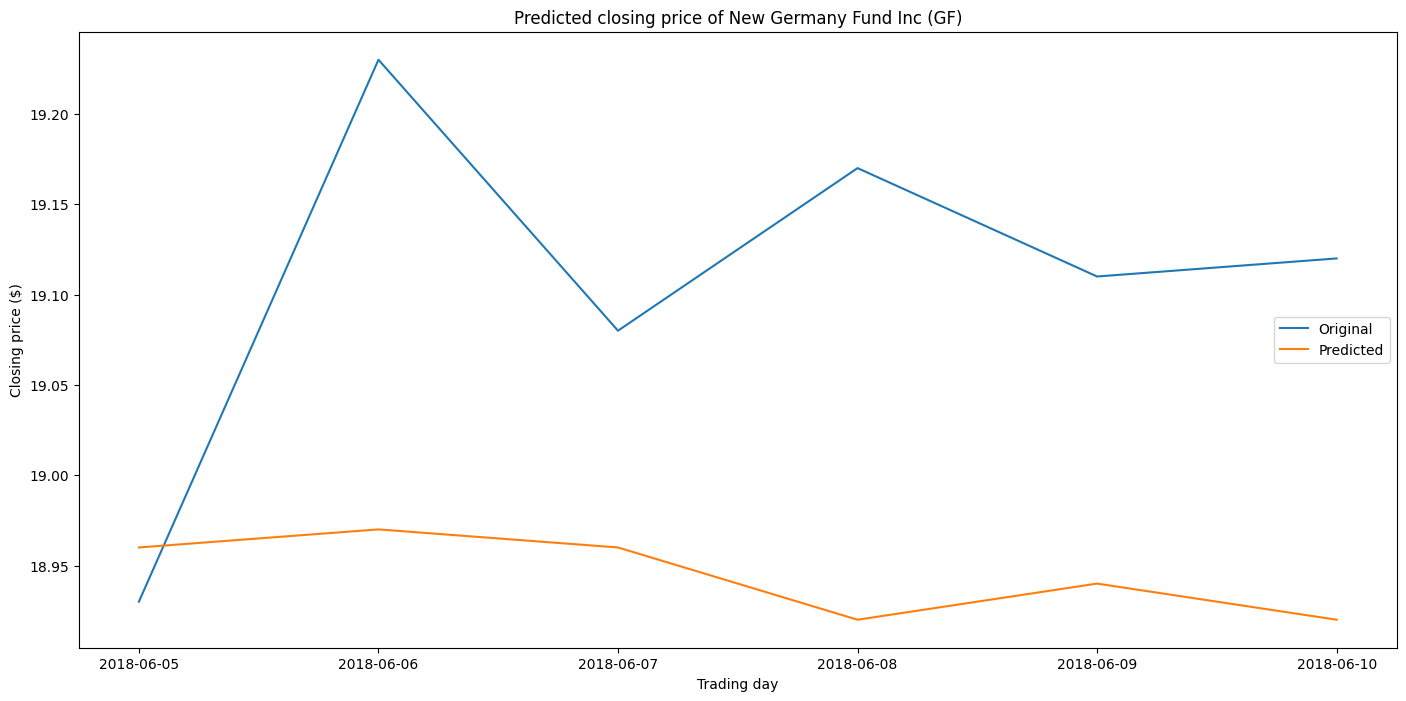

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

comparison = pd.DataFrame({'actual': [18.93, 19.23, 19.08, 19.17, 19.11, 19.12],
                            'predicted': [18.96, 18.97, 18.96, 18.92, 18.94, 18.92]},
                            index = pd.date_range(start='2018-06-05', periods=6,))
#Plot predicted vs actual price
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual)
plt.plot(comparison.predicted)
plt.title('Predicted closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.legend(['Original','Predicted'],loc='center right')
plt.grid(False)
plt.show()